<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial118_binary_semantic_segmentation_using_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/oBIkr7CAE6g

Binary semantic segmentation using U-Net
Dataset: https://www.epfl.ch/labs/cvlab/data/data-em/

In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
import os

folder_path = "/kaggle/output/filtered_masks"

# Get the list of files in the folder
files = os.listdir(folder_path)

# Filter only the files with certain extensions, e.g., '.jpg' or '.png'
image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Print the number of images
print(f"Number of images in {folder_path}: {len(image_files)}")


Number of images in /kaggle/output/filtered_masks: 800


In [ ]:
import os
import shutil

image_folder_path = "/kaggle/input/data-maen2/Maen"
mask_folder_path = "/kaggle/input/mask-maen2/SegmentationClass"

output_image_folder_path = "/kaggle/output/filtered_images"
output_mask_folder_path = "/kaggle/output/filtered_masks"

# Create output folders if they don't exist
os.makedirs(output_image_folder_path, exist_ok=True)
os.makedirs(output_mask_folder_path, exist_ok=True)

# Get the list of image and mask files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(".jpg")]
mask_files = [f for f in os.listdir(mask_folder_path) if f.endswith(".png")]

# Find images with corresponding masks
images_with_masks = set(image_files) & set([mask_file.replace(".png", ".jpg") for mask_file in mask_files])

# Copy images and masks to the output folders
for image_file in images_with_masks:
    image_path = os.path.join(image_folder_path, image_file)
    mask_path = os.path.join(mask_folder_path, image_file.replace(".jpg", ".png"))

    # Copy the image to the output folder
    shutil.copy(image_path, os.path.join(output_image_folder_path, image_file))
    # Copy the corresponding mask to the output folder
    shutil.copy(mask_path, os.path.join(output_mask_folder_path, image_file.replace(".jpg", ".png")))

print("Images with corresponding masks have been copied to the output folders.")


Images with corresponding masks have been copied to the output folders.


In [ ]:
output_image_folder = "/kaggle/output/images"
output_mask_folder = "/kaggle/output/masks"


In [ ]:
image_directory = output_image_folder
mask_directory = output_mask_folder

In [ ]:
SIZE = 256
num_images = 800

In [ ]:
output_image_folder_path = "/kaggle/output/filtered_images"
output_mask_folder_path = "/kaggle/output/filtered_masks"

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/kaggle/output/filtered_images/*.jpg")
print(image_names)

['/kaggle/output/filtered_images/f5b320e47.jpg', '/kaggle/output/filtered_images/c1577d6ff.jpg', '/kaggle/output/filtered_images/47a9b9c85.jpg', '/kaggle/output/filtered_images/94e3ee08b.jpg', '/kaggle/output/filtered_images/229716799.jpg', '/kaggle/output/filtered_images/952e7d15c.jpg', '/kaggle/output/filtered_images/88a891a39.jpg', '/kaggle/output/filtered_images/76f679a5c.jpg', '/kaggle/output/filtered_images/0c264c98e.jpg', '/kaggle/output/filtered_images/526a2a9ef.jpg', '/kaggle/output/filtered_images/6231cf54f.jpg', '/kaggle/output/filtered_images/379ef727d.jpg', '/kaggle/output/filtered_images/7b9dfab15.jpg', '/kaggle/output/filtered_images/efa2ec01b.jpg', '/kaggle/output/filtered_images/aaf9d5f5c.jpg', '/kaggle/output/filtered_images/91c9c8b5e.jpg', '/kaggle/output/filtered_images/e55ddec1a.jpg', '/kaggle/output/filtered_images/9658b9c3c.jpg', '/kaggle/output/filtered_images/05ac5dc96.jpg', '/kaggle/output/filtered_images/a6aeedae1.jpg', '/kaggle/output/filtered_images/277fff4

In [ ]:
image_names.sort()
print(image_names)

['/kaggle/output/filtered_images/00333207f.jpg', '/kaggle/output/filtered_images/005b0d8bb.jpg', '/kaggle/output/filtered_images/00764ad5d.jpg', '/kaggle/output/filtered_images/00b70a919.jpg', '/kaggle/output/filtered_images/013669953.jpg', '/kaggle/output/filtered_images/01e2c61d9.jpg', '/kaggle/output/filtered_images/01f37f1d3.jpg', '/kaggle/output/filtered_images/02b6f199c.jpg', '/kaggle/output/filtered_images/034090252.jpg', '/kaggle/output/filtered_images/035bdc07a.jpg', '/kaggle/output/filtered_images/037d96952.jpg', '/kaggle/output/filtered_images/03a242bd2.jpg', '/kaggle/output/filtered_images/041707ba8.jpg', '/kaggle/output/filtered_images/0429c9ff6.jpg', '/kaggle/output/filtered_images/043a957ca.jpg', '/kaggle/output/filtered_images/058ad1382.jpg', '/kaggle/output/filtered_images/05ac5dc96.jpg', '/kaggle/output/filtered_images/05e946e1f.jpg', '/kaggle/output/filtered_images/060740e25.jpg', '/kaggle/output/filtered_images/06152e5bf.jpg', '/kaggle/output/filtered_images/06812a4

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

Read masks the same way.

In [ ]:
mask_names = glob.glob("/kaggle/output/filtered_masks/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (800, 1024, 1024, 1)
Mask data shape is:  (800, 1024, 1024, 1)
Max pixel value in image is:  255
Labels in the mask are :  [ 0 93]


In [ ]:
import numpy as np
import cv2

# Assuming image_dataset and mask_dataset are your original data

# Define the new size
new_size = (256, 256)

# Resize image_dataset
resized_image_dataset = np.zeros((image_dataset.shape[0], new_size[0], new_size[1], 1))
for i in range(image_dataset.shape[0]):
    resized_image_dataset[i, :, :, 0] = cv2.resize(image_dataset[i, :, :, 0], (new_size[1], new_size[0]))

# Resize mask_dataset
resized_mask_dataset = np.zeros((mask_dataset.shape[0], new_size[0], new_size[1], 1))
for i in range(mask_dataset.shape[0]):
    resized_mask_dataset[i, :, :, 0] = cv2.resize(mask_dataset[i, :, :, 0], (new_size[1], new_size[0]), interpolation=cv2.INTER_NEAREST)

# Print the shapes and other information
print("Resized Image data shape is: ", resized_image_dataset.shape)
print("Resized Mask data shape is: ", resized_mask_dataset.shape)
print("Max pixel value in resized image is: ", resized_image_dataset.max())
print("Labels in the resized mask are : ", np.unique(resized_mask_dataset))


Resized Image data shape is:  (800, 256, 256, 1)
Resized Mask data shape is:  (800, 256, 256, 1)
Max pixel value in resized image is:  255.0
Labels in the resized mask are :  [ 0. 93.]


In [ ]:
#scaler = MinMaxScaler()

In [ ]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [ ]:
image_dataset=resized_image_dataset.copy()

In [ ]:
mask_dataset=resized_mask_dataset.copy()

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


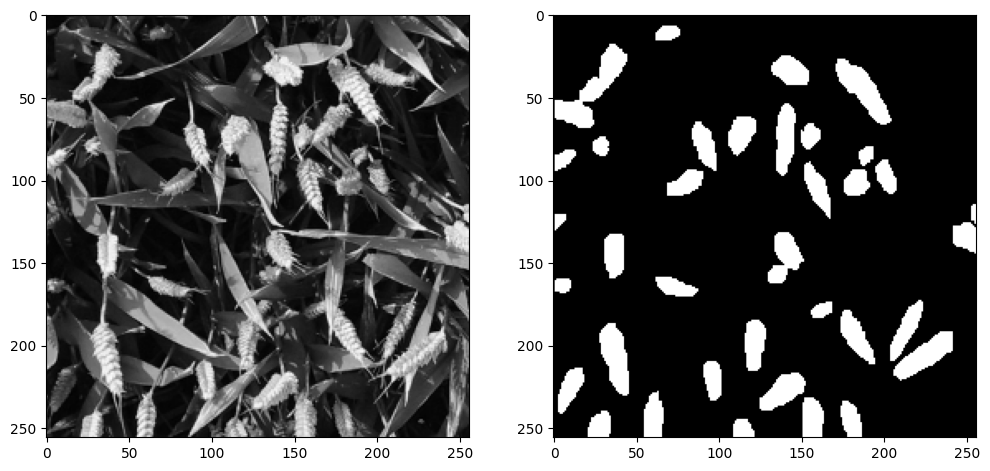

In [ ]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,054,145 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 4,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)


Epoch 1/25


2024-03-02 18:22:29.412150: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 0.961309, expected 0.421057
2024-03-02 18:22:29.412219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 2.31528, expected 1.77503
2024-03-02 18:22:29.412229: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 2.17812, expected 1.63786
2024-03-02 18:22:29.412237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65539: 2.11732, expected 1.57707
2024-03-02 18:22:29.412245: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65540: 2.64766, expected 2.1074
2024-03-02 18:22:29.412253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65541: 2.68691, expected 2.14665
2024-03-02 18:22:29.412261: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65542: 2.00241, expected 1.46216
2024-03-02 18:22:29.412269

  1/160 ━━━━━━━━━━━━━━━━━━━━ 1:38:11 37s/step - accuracy: 0.1439 - loss: 1.1227

I0000 00:00:1709403772.520603     358 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 134ms/step - accuracy: 0.7893 - loss: 0.3670 - val_accuracy: 0.8683 - val_loss: 0.2304
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8797 - loss: 0.1457 - val_accuracy: 0.8683 - val_loss: 0.1747
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1325 - val_accuracy: 0.8683 - val_loss: 0.1719
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1237 - val_accuracy: 0.8683 - val_loss: 0.2167
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1194 - val_accuracy: 0.8683 - val_loss: 0.1920
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1176 - val_accuracy: 0.8683 - val_loss: 0.2162
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1154 - val_accuracy: 0.8683 - val_loss: 0.1689
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8798 - loss: 0.1130 - val

In [ ]:
#Save the model for future use
model.save('/kaggle/working/tutorial118_mitochondria_25epochs.hdf5')

In [ ]:
model.save('/kaggle/working/tutorial118_mitochondria_25epochs.h5')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/kaggle/working/tutorial118_mitochondria_25epochs.pb.

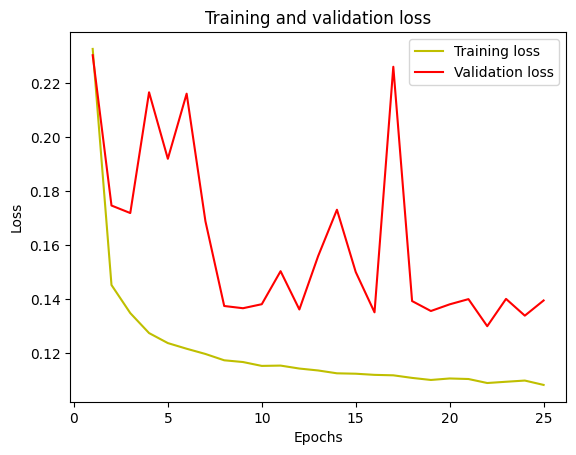

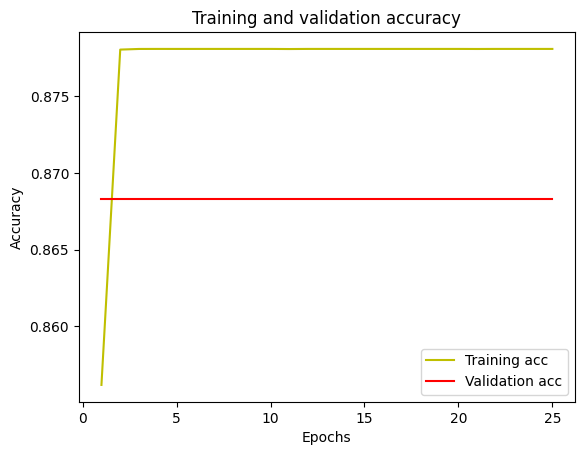

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/kaggle/working/tutorial118_mitochondria_25epochs.hdf5", compile=False)


In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

2024-03-02 18:37:45.394630: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 1.05936, expected 0.681349
2024-03-02 18:37:45.394695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 2.21753, expected 1.83952
2024-03-02 18:37:45.394711: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 2.5462, expected 2.16819
2024-03-02 18:37:45.394724: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65539: 2.07291, expected 1.6949
2024-03-02 18:37:45.394734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65540: 2.56529, expected 2.18728
2024-03-02 18:37:45.394745: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65542: 2.19261, expected 1.8146
2024-03-02 18:37:45.394757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65543: 1.83463, expected 1.45662
2024-03-02 18:37:45.394767: E

5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 244ms/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.9999999


(1, 256, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(256, 256)


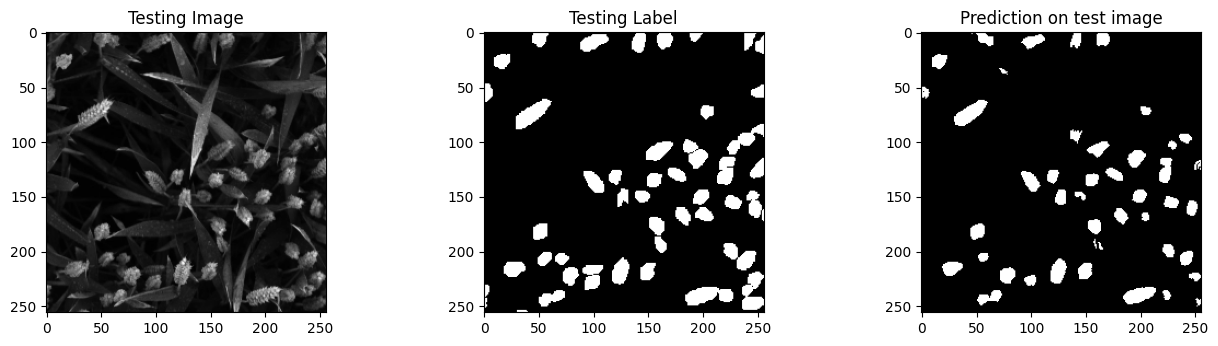

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
threshold = 0.3
prediction = (model.predict(test_img_input)[0, :, :, 0] > threshold).astype(np.uint8)

#prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [ ]:
raw_prediction = model.predict(test_img_input)[0, :, :, 0]
print("Raw Prediction Values:", raw_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Raw Prediction Values: [[7.45094672e-04 9.53361858e-04 6.36860321e-04 ... 1.72427436e-03
  2.83225486e-03 3.12486198e-03]
 [1.04250072e-03 2.63754907e-03 2.38445704e-03 ... 5.57918195e-03
  9.21130273e-03 1.16692008e-02]
 [1.69222755e-03 6.31056633e-03 3.67697841e-03 ... 7.79577205e-03
  8.43472406e-03 8.94026924e-03]
 ...
 [5.21050650e-04 1.73832639e-04 4.79627088e-05 ... 2.87760884e-01
  2.93344826e-01 2.82063246e-01]
 [1.16099138e-03 5.34370309e-04 1.07064545e-04 ... 2.91898400e-01
  3.07344854e-01 2.51614243e-01]
 [1.63340475e-03 1.62924523e-03 6.81895937e-04 ... 2.62749642e-01
  2.87926912e-01 1.89115360e-01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Inference time on CPU: 0.0755 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Inference time on GPU: 0.0721 seconds


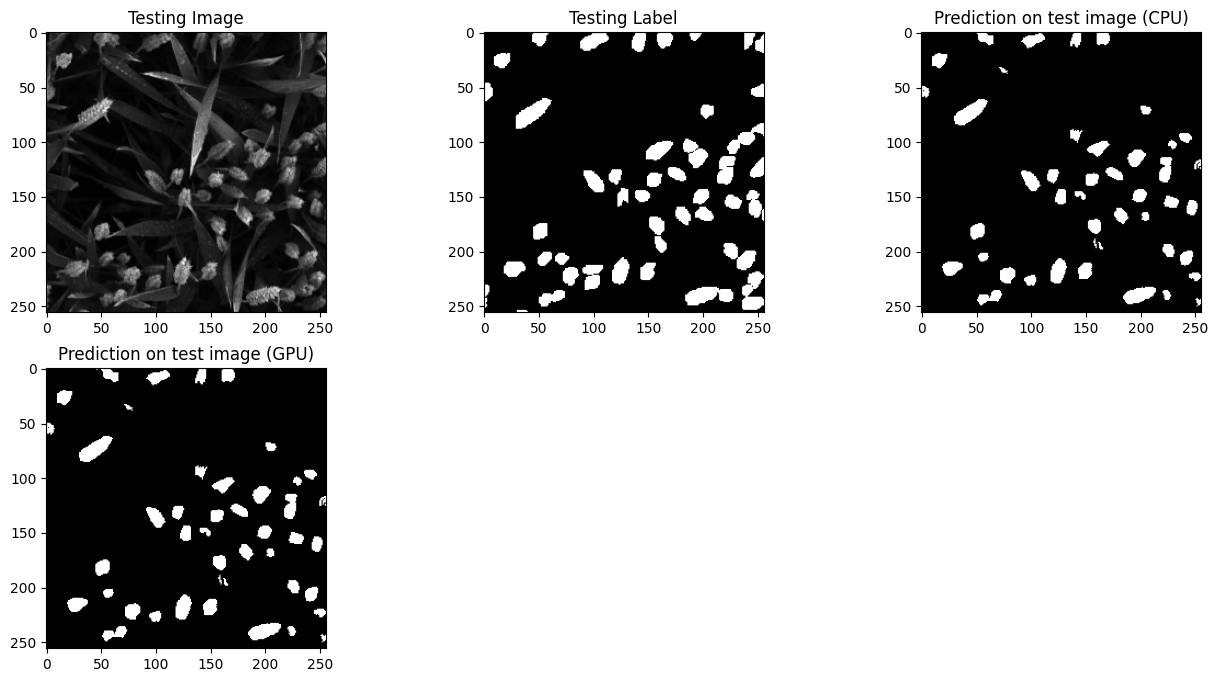

In [ ]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported your model, X_test, y_test, and other necessary libraries

# Randomly select a test image
test_img_number = random.randint(0, len(X_test) - 1)
test_img = X_test[test_img_number]
ground_truth = y_test[test_img_number]
test_img_input = np.expand_dims(test_img, 0)

# Set the threshold for prediction
threshold = 0.3

# Measure inference time on CPU
start_time_cpu = time.time()
prediction_cpu = (model.predict(test_img_input)[0, :, :, 0] > threshold).astype(np.uint8)
end_time_cpu = time.time()

# Print and visualize results for CPU
print(f"Inference time on CPU: {end_time_cpu - start_time_cpu:.4f} seconds")

# Measure inference time on GPU
try:
    import tensorflow as tf

    # Ensure TensorFlow is using GPU
    if tf.test.is_gpu_available():
        with tf.device('/GPU:0'):
            start_time_gpu = time.time()
            prediction_gpu = (model.predict(test_img_input)[0, :, :, 0] > threshold).astype(np.uint8)
            end_time_gpu = time.time()

        # Print and visualize results for GPU
        print(f"Inference time on GPU: {end_time_gpu - start_time_gpu:.4f} seconds")

        # Visualize the results
        plt.figure(figsize=(16, 8))
        plt.subplot(231)
        plt.title('Testing Image')
        plt.imshow(test_img[:, :, 0], cmap='gray')
        plt.subplot(232)
        plt.title('Testing Label')
        plt.imshow(ground_truth[:, :, 0], cmap='gray')
        plt.subplot(233)
        plt.title('Prediction on test image (CPU)')
        plt.imshow(prediction_cpu, cmap='gray')
        plt.subplot(234)
        plt.title('Prediction on test image (GPU)')
        plt.imshow(prediction_gpu, cmap='gray')

        plt.show()

    else:
        print("GPU is not available. Running only on CPU.")

except ImportError:
    print("TensorFlow is not installed. Running only on CPU.")


In [ ]:
!pip install tf2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.2 MB/s eta 0:00:00a 0:00:01


In [ ]:
!python -m tf2onnx.convert \
  --saved-model /kaggle/working \
  --output /kaggle/working/tutorial118_mitochondria_25epochs.onnx \
  --opset 11


/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2024-03-02 18:55:47,663 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/convert.py", line 714, in <module>
    main()
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/convert.py", line 242, in main
    graph_def, inputs, outputs, initialized_tables, tensors_to_rename = tf_loader.from_saved_model(
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/tf_loader.py", line 636, in from_saved_model
    _from_saved_

In [ ]:
!ls /kaggle/working/

tutorial118_mitochondria_25epochs.h5  tutorial118_mitochondria_25epochs.hdf5


In [ ]:
!pip install keras2onnx onnxruntime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=ba6ecbc2f61d5261a1b0086cdad3c8c3547eded945f5d1d62e3d8f78079011c2
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20

In [ ]:
!pip install keras2onnx --upgrade


In [ ]:
from keras.models import load_model

model = load_model('/kaggle/working/tutorial118_mitochondria_25epochs.hdf5')


In [ ]:
!pip install keras-retinanet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=129668 sha256=19f920c28580866e4d0bb17c431f4fce9a23ebb84f1a731411824f1bc744cd74
  Stored in directory: /root/.cache/pip/wheels/42/ee/d4/b54905a92241002b36db880e88b902ebcb015ce5ae311a16da
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20457 sha256=976b4707dbed1df73f00ef8ea8520ddc8f64edaf1a972d1c65bff0b22410c95d
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-retinanet keras-resnet


In [ ]:
import tensorflow as tf

print(tf.__version__)


2.15.0


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras_retinanet.models import load_model

print("\nTensorFlow version:", tf.__version__)
#print("Keras version:", keras.__version__, "\n")

# Load the model
model = load_model("/kaggle/working/tutorial118_mitochondria_25epochs.h5")

# Check its architecture
model.summary()

# Save the model in SavedModel format
model.save(filepath='/kaggle/working/model_tf')


TensorFlow version: 2.15.0


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,054,147 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

 Optimizer params: 2 (12.00 B)

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/kaggle/working/model_tf.

In [ ]:
!python -m tf2onnx.convert --saved-model /kaggle/working/tutorial118_mitochondria_25epochs.hdf5 --output model2.onnx

/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2024-03-02 19:03:47,153 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/convert.py", line 714, in <module>
    main()
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/convert.py", line 242, in main
    graph_def, inputs, outputs, initialized_tables, tensors_to_rename = tf_loader.from_saved_model(
  File "/opt/conda/lib/python3.10/site-packages/tf2onnx/tf_loader.py", line 636, in from_saved_model
    _from_saved_